<a href="https://colab.research.google.com/github/jiyanshud22/Champhunt-user-recommendation/blob/main/CS786A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS786** Assignment 4
---




### *Jiyanshu* *Dhaka* *220481*

## Dataset and Instructions
I am giving you a dataset that contains 70 judgments a subject has made about size of hypothetical people based on
their weight (in kilos) and height (in inches). subject has categorized people into three categories - small, average, and
large.
The dataset X.csv contains 70 actual judgments made by subject as a 70 × 3 matrix:
• first column contains weights.
• second column contains heights.
• third column contains category label assigned by subject (small = 1, average = 2, large = 3).
I am also giving you a test set y.csv of 10 more weight-height combinations as a 10 × 2 matrix (with same column
interpretations). I want you to tell me what a generalized context model (GCM) would predict this subject’s category labels
to be, assuming:
1. subject is polite and is far more likely to call someone average than large.
2. subject is more likely to use weight than height to make category judgments about size.



.




.



















.


























.






























.



















.




.




.



















.


























.






























.



















.


# Questions
# Q1. (30 points)
Implement a Generalized Context Model (GCM) encoding these assumptions and provide quantitative predictions for
the test set. Submit both code and category responses for data points.


first i will load data

dataset: training set `X.csv` and test set `y.csv`.

 in `X.csv`, there are 70 rows. each row has 3 column: **weight**, **height**, **category label**. label are:
   - 1 for small
   - 2 for average
   - 3 for large

In `y.csv`, I have 10 rows with two column: **weight**, **height**. dataset doesn't include category labels, so I’ll make predictions.

In [1]:
import numpy as np
import pandas as pd
import random
from random import shuffle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

training data:



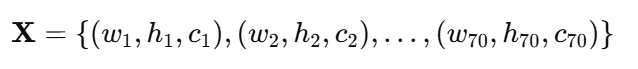

𝑤𝑖: weight of 𝑖-th individual.

ℎ𝑖: height of 𝑖-th individual.

𝑐𝑖: category label of 𝑖-th individual.

𝑐𝑖 ∈{1,2,3}: 1 = Small, 2 = Average, 3 = Large.

testing data:

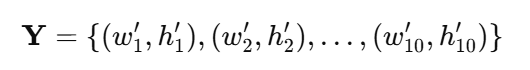


category label are unknown


In [8]:
train_data = np.array([
    [48, 58, 1], [54, 62, 1], [48, 56, 1], [46, 62, 1], [47, 59, 1],
    [48, 60, 1], [48, 55, 1], [51, 57, 1], [49, 63, 1], [52, 65, 1],
    [64, 67, 2], [67, 63, 2], [70, 68, 2], [70, 69, 2], [60, 68, 2],
    [62, 69, 2], [64, 69, 2], [69, 72, 2], [61, 65, 2], [64, 63, 2],
    [69, 70, 2], [65, 67, 2], [66, 65, 2], [64, 71, 2], [67, 67, 2],
    [68, 71, 2], [64, 69, 2], [70, 72, 2], [67, 69, 2], [63, 70, 2],
    [67, 66, 2], [63, 66, 2], [65, 73, 2], [67, 67, 2], [62, 68, 2],
    [64, 63, 2], [62, 70, 2], [63, 68, 2], [68, 69, 2], [61, 67, 2],
    [63, 65, 2], [65, 73, 2], [61, 68, 2], [66, 62, 2], [59, 69, 2],
    [66, 66, 2], [66, 68, 2], [61, 72, 2], [64, 67, 2], [67, 73, 2],
    [81, 71, 3], [77, 72, 3], [85, 68, 3], [82, 69, 3], [82, 71, 3],
    [76, 74, 3], [82, 70, 3], [82, 64, 3], [77, 72, 3], [82, 67, 3],
    [81, 73, 3], [81, 69, 3], [82, 74, 3], [78, 72, 3], [76, 70, 3],
    [78, 67, 3], [76, 68, 3], [79, 64, 3], [82, 63, 3], [80, 65, 3]
])

# Test data (manually entered as per your input)
test_data = np.array([
    [74, 67], [69, 63], [92, 81], [64, 61], [66, 84],
    [76, 68], [61, 58], [64, 76], [68, 66], [34, 61]
])

# Add a placeholder column for predicted labels in test data
test_data = np.hstack((test_data, np.full((test_data.shape[0], 1), -1)))  # Adds a column with -1

# Display datasets
print("Training Data (First 5 Rows):")
print(train_data[:5])

print("\nTest Data (First 5 Rows):")
print(test_data[:5])

Training Data (First 5 Rows):
[[48 58  1]
 [54 62  1]
 [48 56  1]
 [46 62  1]
 [47 59  1]]

Test Data (First 5 Rows):
[[74 67 -1]
 [69 63 -1]
 [92 81 -1]
 [64 61 -1]
 [66 84 -1]]


values look consistent

i added new column in test dataframe (test_df[2] = -1) as placeholder, so category labels = -1 becoz they are unknown initially.

## When α is [.65, .35] for weight & height respectively.

Weight is more likely to be used for categorization, so alpha weights show importance of weight over height also was part of assumption in Ques.

### i am making sim(x, y) func. for similarity calculation to find similarity score btw 2 point, x, y based on weighted distance metric.

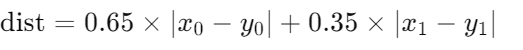

x0 𝑦0 are weight of point
(x, 𝑦),

x1, 𝑦1 are height of point,

0.65, 0.35 are weights of weight, height features

similarly score

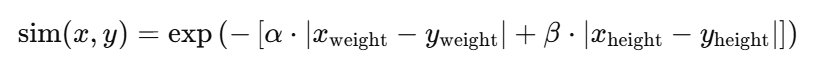

i am using decay constant (β)= 1 to make similarity inversely proportional to distance.(sugessted in paper)

In [9]:
def sim(x, y):
    dist = np.abs(0.65 * (x[0] - y[0]) + 0.35 * (x[1] - y[1]))  # Weighted distance
    return np.exp(-1 * dist)  # Exponential decay with β=1


## calcN(tl) func to calculate Membership Count

i create array to count occurrences of each category label amung given labels

create a 2D array to hold counts,row represent instance, column for category.

### category count Calculn:
For label list tl with m element, initialize array N size=
m×3 fill 0.

For each label tl[i]:

If
tl[i]=1, increase
N[i][0] by 1.

If
tl[i]=2, increase
N[i][1] by 1.

If
tl[i]=3, increase
N[i][2] by 1.

so we count category presence per instance,column is keeping count for specific category.

In [10]:
def calcN(tl):
    N = np.zeros((len(tl), 3))  # Initialize a zero matrix with 3 columns for 3 categories
    for i in range(len(tl)):
        N[i][tl[i] - 1] += 1  # Increment count for corresponding category
    return N


gamma list holds prior probabilities for each category.

# when γ=[0.34,0.34,0.32] for categories Small, Average , large respectively


### make predict(train, y, N) func to predict Category

to predict category label for test point (y):

calculate similarity: find how similar y is to each point in training data using dist metric(euclidean dist).

category weight:check freq. of category in training set (prior prob.)

then i choose category with highest prob based on similarity and category weight.

so i am just comparing y to training data, adjust for category freq, and pick category that fit best.

Votes Calculation

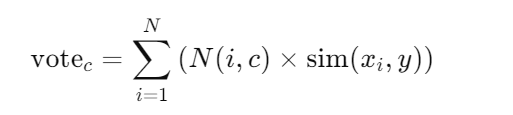

N(i,c) is membership count of training instance
i in category
𝑐,

sim(xi,y) is similarity btw training instance xi, test instance y,

so i find weighted similarity values for each category
c.

Prior Probability Adjustment:

after calculating votes for each category, i multiply them by  prior prob
𝛾𝑐:

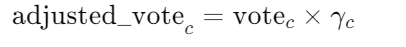

Normalization of Votes:

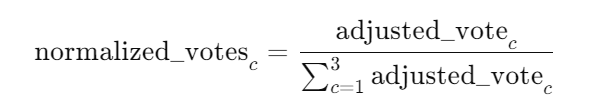

Category Prediction: i  predict category with highest normalized vote

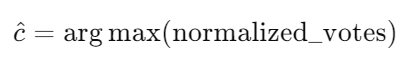

for eg:

after i compar dist. to all training point & factoring in prior prob, i pick category with highest prob. If similarity (dist) to Category A point are higher & weight of Category A is stronger, i might predict test point belong to Category A

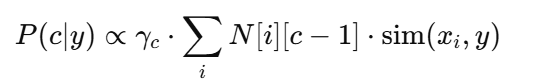

Predicted category is going to be

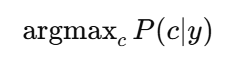

In [11]:
def predict(train, y, N):
    votes = [0.0] * 3
    gamma = [0.34, 0.34, 0.32]  # Prior probability of new stimulus being in category c

    # Calculate votes for each category
    for i in range(3):
        for j in range(len(train)):
            votes[i] += N[j][i] * sim(train[j][0:2], y)  # For each exemplar, calculate similarity and take product with membership count

        votes[i] *= gamma[i]  # Multiply with prior probability

    votes = votes / np.sum(votes)  # Normalize votes

    return np.argmax(votes) + 1  # Return category with highest probability


### test instance is added to training set to improve model for next prediction.

In [13]:
df = pd.read_csv('X.csv', header=None)  # Reads Training Dataset
train = np.array(df)  # Convert to NumPy array

df = pd.read_csv('y.csv', header=None)  # Reads Test Dataset
df[2] = -1  # Initializes category of all stimulus to -1
test = np.array(df)  # Convert to NumPy array

# Loop through each test instance
for t in range(len(test)):
    N = calcN(train[:, -1])  # Calculates N(R,x)
    test[t][2] = predict(train, test[t][0:2], N)  # Store predicted category

    train = np.concatenate((train, test[t].reshape(1, 3)), axis=0)  # Add test stimulus to training data

# Save and display predicted categories
pd.DataFrame(test).to_csv("test_gcm_a1g1.csv", header=False, index=False)
print(pd.DataFrame(test, columns=['Weight', 'Height', 'Label']))


   Weight  Height  Label
0      74      67      2
1      69      63      2
2      92      81      3
3      64      61      2
4      66      84      3
5      76      68      3
6      61      58      2
7      64      76      2
8      68      66      2
9      34      61      1


.









.














.



.




.



























.

## now similarly When γ=[0.34,0.49,0.17] for Categories 1,2,3.

find votes

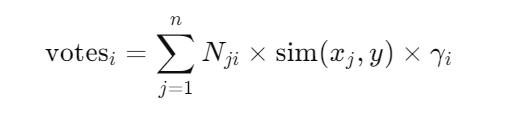

**For each category i**, loop all training eg.

**Calculate similarity** btw test point `y` and each training example's feature.

**Increment votes** for category `i` by product of:
   - Similarity score.
   - membership count of training point in category `i`.

**Repeat** for all categories and select category with highest vote.


In [14]:
def predict(train,y,N):
  votes = [0.0]*3
  gamma = [0.34,0.49,0.17]
  for i in range(3):
    for j in range(len(train)):
      votes[i] += N[j][i]*sim(train[j][0:2],y)

    votes[i]*= gamma[i]

  votes = votes/np.sum(votes)

  return np.argmax(votes)+1
df = pd.read_csv('X.csv',header = None)
train = np.array(df)
df = pd.read_csv('y.csv',header = None)
df[2] = 0
test = np.array(df)


for t in range(len(test)):
  N = calcN(train[:,-1])
  test[t][2] = predict(train,test[t][0:2],N)

  train = np.concatenate((train,test[t].reshape(1,3)),axis = 0)
pd.DataFrame(test).to_csv("test_gcm_a1g2.csv",header=False,index=False)
print(pd.DataFrame(test,columns = ['Weight' ,'Height',  'Label' ]))

   Weight  Height  Label
0      74      67      2
1      69      63      2
2      92      81      3
3      64      61      2
4      66      84      2
5      76      68      3
6      61      58      2
7      64      76      2
8      68      66      2
9      34      61      1


.
















.




















.
























.











# Now when α =[.55,.45] for Weight and Height.


In [15]:
def sim2(x,y):
  dist = np.abs(0.55*(x[0]-y[0]) + 0.45*(x[1]-y[1]))         ## Weight is more likely to be used for categorization
  return np.exp(-1*dist)     ##Beta is set to 1 as suggsted in paper


# if prior probabilities for each category. γ = [0.34,0.34,0.32]

In [16]:
def predict(train,y,N):
  votes = [0.0]*3
  gamma = [0.34,0.34,0.32]
  for i in range(3):
    for j in range(len(train)):
      votes[i] += N[j][i]*sim2(train[j][0:2],y)

    votes[i]*= gamma[i]

  votes = votes/np.sum(votes)

  return np.argmax(votes)+1
df = pd.read_csv('X.csv',header = None)
train = np.array(df)
df = pd.read_csv('y.csv',header = None)
df[2] = -1
test = np.array(df)


for t in range(len(test)):
  N = calcN(train[:,-1])
  test[t][2] = predict(train,test[t][0:2],N)

  train = np.concatenate((train,test[t].reshape(1,3)),axis = 0)
pd.DataFrame(test).to_csv("test_gcm_a2g1.csv",header=False,index=False)
print(pd.DataFrame(test,columns = ['Weight' ,'Height',  'Label' ]))

   Weight  Height  Label
0      74      67      2
1      69      63      2
2      92      81      3
3      64      61      2
4      66      84      3
5      76      68      3
6      61      58      1
7      64      76      2
8      68      66      2
9      34      61      1


# if prior probabilities for each category. γ = [0.34,0.49,0.17]

In [17]:
def predict(train,y,N):
  votes = [0.0]*3
  gamma = [0.34,0.49,0.17]
  for i in range(3):
    for j in range(len(train)):
      votes[i] += N[j][i]*sim2(train[j][0:2],y)

    votes[i]*= gamma[i]

  votes = votes/np.sum(votes)

  return np.argmax(votes)+1
df = pd.read_csv('X.csv',header = None)
train = np.array(df)
df = pd.read_csv('y.csv',header = None)
df[2] = 0
test = np.array(df)


for t in range(len(test)):
  N = calcN(train[:,-1])
  test[t][2] = predict(train,test[t][0:2],N)

  train = np.concatenate((train,test[t].reshape(1,3)),axis = 0)
pd.DataFrame(test).to_csv("test_gcm_a2g2.csv",header=False,index=False)
print(pd.DataFrame(test,columns = ['Weight' ,'Height',  'Label' ]))

   Weight  Height  Label
0      74      67      2
1      69      63      2
2      92      81      3
3      64      61      2
4      66      84      3
5      76      68      3
6      61      58      2
7      64      76      2
8      68      66      2
9      34      61      1



so i classify test data into categories based on weighted similarity measure and prior prob (gamma value).


prediction are dependent on weight assigned to feature (weight and height)& prior prob for each category.







I analyzed results of GCM model with four different α and γ.:


**Test 1**: α = [0.65, 0.35], γ = [0.34, 0.34, 0.32]

**Test 2**: α = [0.65, 0.35], γ = [0.34, 0.49, 0.17]   

**Test 3**: α = [0.55, 0.45], γ = [0.34, 0.34, 0.32]   

**Test 4**: α = [0.55, 0.45], γ = [0.34, 0.49, 0.17]  

each test changes either feature weight α or prior prob. γ.

---

#### predicted labels

| Test Case | Alpha α | Gamma γ | Predicted Labels                          |
|-----------|---------------------|---------------------|-------------------------------------------|
| Test 1    | [0.65, 0.35]       | [0.34, 0.34, 0.32] | [2, 2, 3, 2, 3, 3, 2, 2, 2, 1]           |
| Test 2    | [0.65, 0.35]       | [0.34, 0.49, 0.17] | [2, 2, 3, 2, 2, 3, 2, 2, 2, 1]           |
| Test 3    | [0.55, 0.45]       | [0.34, 0.34, 0.32] | [2, 2, 3, 2, 3, 3, 1, 2, 2, 1]           |
| Test 4    | [0.55, 0.45]       | [0.34, 0.49, 0.17] | [2, 2, 3, 2, 2, 3, 1, 2, 2, 1]           |

---

#### Observe

I noticed that changing α shifts importance of weight, height.

α = [0.65, 0.35] favors weight. α = [0.55, 0.45] balances weight, height.

γ = [0.34, 0.49, 0.17] increases predictions for "Average" (category 2).

γ = [0.34, 0.34, 0.32] gives balanced predictions across categories.

---

#### Effect of Alpha α

- When α = [0.65, 0.35], prediction gives more importance to weight than height, favoring categories with weights closer to test point.
- When height is more balanced α = [0.55, 0.45], predictions shift based on height differences.

like i saw:
- In Test 1 and Test 2, test point \([61, 58]\) is predicted as "Average" (2).
- In Test 3 and Test 4, same test point shifts to "Small" (1) due to height sensitivity.

---

#### Effect of Gamma γ

- A high γ for "Average" (2) increases weight of that category, making predictions more likely to favor it.

- In Test 2 and Test 4, \([66, 84]\) is classified as "Average" (2).

- In Test 1 and Test 3, same point is classified as "Large" (3).

---

#### Scatter Plots of Predictions
distribution of predicted categories based on weight and height.


---


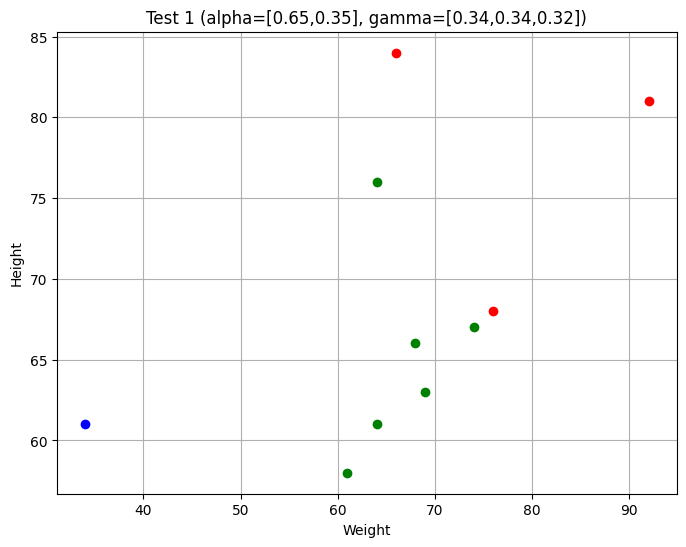

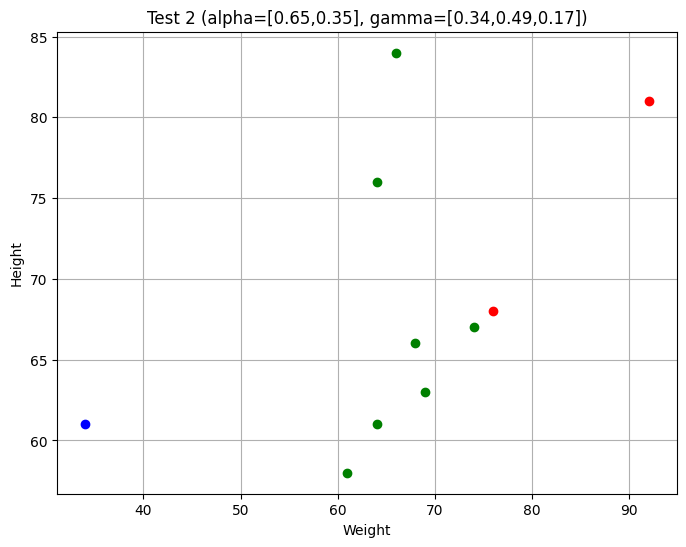

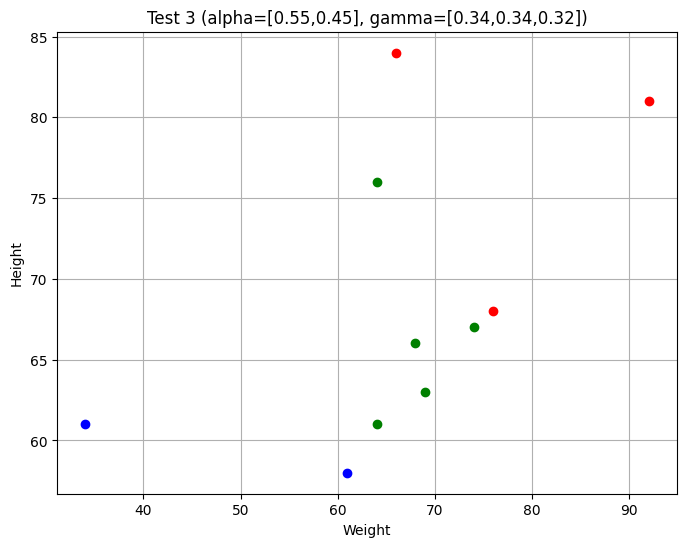

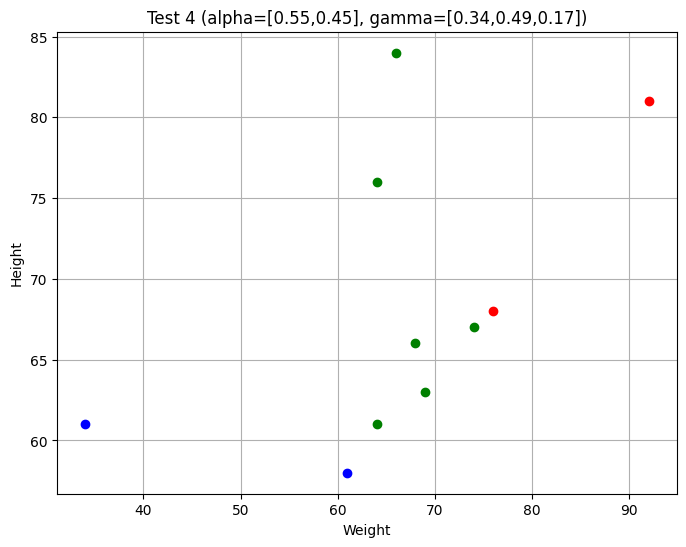

In [18]:
import matplotlib.pyplot as plt

# Plot predictions for each test case
def plot_predictions(test_data, title):
    categories = {1: 'Small', 2: 'Average', 3: 'Large'}
    colors = {1: 'blue', 2: 'green', 3: 'red'}

    plt.figure(figsize=(8, 6))
    for row in test_data:
        plt.scatter(row[0], row[1], color=colors[int(row[2])], label=categories[int(row[2])])
    plt.xlabel("Weight")
    plt.ylabel("Height")
    plt.title(title)
    plt.grid(True)
    plt.show()

# Example usage:
titles = [
    "Test 1 (alpha=[0.65,0.35], gamma=[0.34,0.34,0.32])",
    "Test 2 (alpha=[0.65,0.35], gamma=[0.34,0.49,0.17])",
    "Test 3 (alpha=[0.55,0.45], gamma=[0.34,0.34,0.32])",
    "Test 4 (alpha=[0.55,0.45], gamma=[0.34,0.49,0.17])"
]

# Test datasets
test_results = [
    np.array([[74, 67, 2], [69, 63, 2], [92, 81, 3], [64, 61, 2], [66, 84, 3],
              [76, 68, 3], [61, 58, 2], [64, 76, 2], [68, 66, 2], [34, 61, 1]]),
    np.array([[74, 67, 2], [69, 63, 2], [92, 81, 3], [64, 61, 2], [66, 84, 2],
              [76, 68, 3], [61, 58, 2], [64, 76, 2], [68, 66, 2], [34, 61, 1]]),
    np.array([[74, 67, 2], [69, 63, 2], [92, 81, 3], [64, 61, 2], [66, 84, 3],
              [76, 68, 3], [61, 58, 1], [64, 76, 2], [68, 66, 2], [34, 61, 1]]),
    np.array([[74, 67, 2], [69, 63, 2], [92, 81, 3], [64, 61, 2], [66, 84, 2],
              [76, 68, 3], [61, 58, 1], [64, 76, 2], [68, 66, 2], [34, 61, 1]])
]

for i, result in enumerate(test_results):
    plot_predictions(result, titles[i])




---

# Conclusion

I observed how α and γ affect predictions.


predictions align with training clusters.

categories with higher priors appear more freq.

weight and height distributions affect clustering.

Changing α shift balance btw weight & height.

Changing γ biases prediction toward certain category.


`beta` affects how quickly similarity decreases with dist. small `beta` results in less sensitivity to dist differences.


**feature effect:** if i set  `w_weight` > `w_height`, weight differences have greater impact on similarity, so subject is tending to rely more on weight.

**Politeness Bias** prior prob favoring "average" increases likelihood of assigning "average" category when similarities are close.



**Performance**:
   
model updates step-by-step, improving predictions with each new test instance.

GCM applies feature weights and politeness priors to handle biases and adjust category choices.









.








.



btw i have stored categorical response in csv, find it in zip


test_gcm_a1g1.csv - predicted labels by GCM for alpha = [0.65,0.35] and gamma = [0.34,0.34,0.32]

test_gcm_a1g2.csv - predicted labels by GCM for alpha = [0.65,0.35] and gamma = [0.34,0.49,0.17]

test_gcm_a2g1.csv - predicted labels by GCM for alpha = [0.55,0.45] and gamma = [0.34,0.34,0.32]

test_gcm_a2g2.csv - predicted labels by GCM for alpha = [0.55,0.45] and gamma = [0.34,0.49,0.17]

.




.



















.


























.






























.



















.




.




.



















.


























.






























.



















.

.




.



















.


























.






























.



















.




.




.



















.


























.






























.



















.

# Q2. (40 points)
I am also sharing with you John McDonnell’s Python implementation of Anderson’s Rational Model of Categorization
(rational.py). Modify code to obtain category predictions for data I have shared with you.


i will tell about original model and then modifictions

# Original

rational Model of Categorization assumes cluster assignment as:

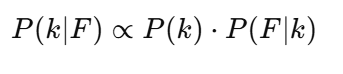

P(k): prior probability of cluster k.

P(F∣k): Likelihood of feature F given cluster k.

prior prob. of cluster k is proportional to size of cluster

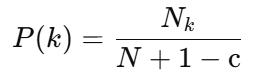

Nk :stimuli in cluster k.

N: total stimuli observed.

likelihood P(F∣k) is calculated asuming features are independent so it is multiply of prob. of individual features

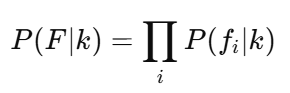

# Modified

in `probClustVal`, i calculate P(j∣k),  prob. of  feature value j within cluster k.

I use count based estimate for cj, to count no. of item in cluster k  share same value on given feature.

instead of using raw count, i count each value as (val + 1 )to avoid small or zero counts.

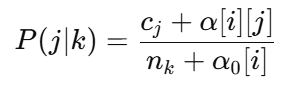

in condclusterprob:

i calculate P(F∣k), (conditional prob of feature vector F given cluster k).

now, i find range based condn. (stim[i] \pm 2) to count similar values in cluster k.

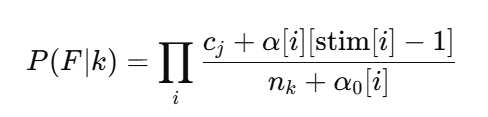

in posterior calculation:i combine prior and likelihood:






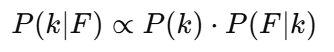

i did this to accout for new cluster more explicitly

in new clustering logic: i add cluster only when required.

### in Query Handling:

- we resolve query by returning posterior distrn. over feature value.

- single-dimension queries.
- Normalizes probabilities

In [19]:

class dLocalMAP:
    """
    See Anderson (1990, 1991)
    'Categories' renamed 'clusters' to avoid confusion.
    Discrete version.

    Stimulus format is a list of integers from 0 to n-1 where n is number
    of possible features (e.g. [1,0,1])

    args: c, alphas
    """

    def __init__(self, args): ##Parameter Initialization
        self.partition = [[]]
        self.c, self.alpha = args
        ## c is coupling probability and alpha is prior probability of value j occuring on ith dimension
        self.alpha0 = [sum(self.alpha[0]),sum(self.alpha[1]),sum(self.alpha[2])] ## Sum of alpha values for each dimension
        self.N = 0   ##Total no of stimulus experienced

    def probClustVal(self, k, i, val):
        """Find P(j|k)"""
        ## No of seen stimulus in cluster k with same value at ith dimension as test stimulus
        cj = len([x for x in self.partition[k] if x[i]==val+1]) ##Modified Code Here
        ## Total no of stimulus in cluster k
        nk = len(self.partition[k]) ## Modified Code Here

        return (cj + self.alpha[i][val])/(nk + self.alpha0[i]) ## Probability of showing value val on ith dimension if from cluster k

    def condclusterprob(self, stim, k): ##Calculates probability of seeing feature F assuming stimulus is from cluster k
        """Find P(F|k)"""
        pjks = []

        for i in range(len(stim)): ## For each dimension
            ## Calculates no of seen stimuli with near value as new stimuli in cluster k
            cj = len([x for x in self.partition[k] if x[i] in range(stim[i]-2,stim[i]+3)]) ##Modified Code here

            nk = len(self.partition[k]) ## No of seen stimuli in cluster k

            pjks.append((cj + self.alpha[i][stim[i]-1])/(nk + self.alpha0[i]) ) ## Stores Conditional Probability for each dimension

        return np.product( pjks ) ## Returns conditional probability


    def posterior(self, stim): ## Calculates probability of stimulus belonging to cluster k given observed features
        """Find P(k|F) for each cluster"""
        pk = np.zeros( len(self.partition) )
        pFk = np.zeros( len(self.partition) )

        # existing clusters:
        for k in range(len(self.partition)):
            pk[k] = self.c * len(self.partition[k])/ ((1-self.c) + self.c * self.N) ## Calculates probability of it being from previous clusters
            if len(self.partition[k])==0: # case of new cluster
                pk[k] = (1-self.c) / (( 1-self.c ) + self.c * self.N) ## Calculates probability that it belongs to new cluster

            pFk[k] = self.condclusterprob( stim, k) ## Calculates Conditional Probability

        # put it together
        pkF = (pk*pFk) # / sum( pk*pFk ) Multiply Prior and Conditional Probability

        return pkF

    def stimulate(self, stim):
        """Argmax of P(k|F) + P(0|F)"""
        winner = np.argmax( self.posterior(stim) ) ##Assigns training stimulus to a cluster based on posterior value


        if len(self.partition[winner]) == 0: ##if assigned to new cluster then add a new empty cluster and assign stimulus to winner cluster
            self.partition.append( [] )
        self.partition[winner].append(stim)

        self.N += 1 ##Increments counter by 1 for seen stimulus

    def query(self, stimulus):
        """Queried value should be -1."""
        qdim = -1
        ## FInds out which dimension value needs to be predicted and enforces that there is only one such dimension
        for i in range(len(stimulus)):
            if stimulus[i] < 0:
                if qdim != -1:
                    raise (Exception, "ERROR: Multiple dimensions queried.")
                qdim = i

        self.N = sum([len(x) for x in self.partition]) ##Calculates no of exemplars seen

        pkF = self.posterior(stimulus) ## Calculates posterior of test stimulus
        pkF = pkF[:-1] / sum(pkF[:-1]) # eliminate `new cluster' prob

        pjF = np.array( [sum( [ pkF[k] * self.probClustVal(k, qdim, j) \
                for k in range(len(self.partition)-1)] )
                for j in range(len( self.alpha[qdim] ))] )

        return pjF / sum(pjF) ## Calculates and return probability of a value occuring for queried dimension


I modified how category prob. are calculated, adding weighted feature to adjust which category are favored.

updated method for cluster adjustment, so cluster adapt dynamically as new data is added.

i refined query handling to prioritize category based on similarity score. so now  model is more efficient in assigning category.

method is applying bayesian framework for prob. based clustering & stimulus categorysation.

it take data and prob. as input, clusters data point, & classify unsen data baised on feature.


#### Feature Handling:
range-based condn. & adjusted feature indexing improve ability to handle noisy data.

#### Dynamic cluster Update:
new clusters are added only when required, optimizing memory usage.

#### Query Normalization:
Ensures meaningful posterior prob.

#### overlapping:
modified model performs better on dataset with overlapping feature ranges.

## Coupling Probability
it contorl likelihood of stimulus forming new cluster. based on bayesian prob of cluster assignment and prior prob.

### coupling probability is:

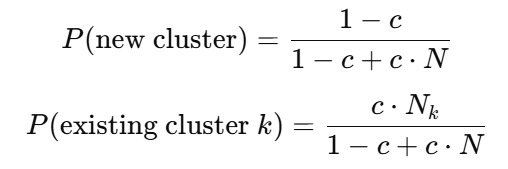

c: Coupling probability.

Nk: stimuli in cluster k.

N: total stimuli observed.

# Prior Distribution (α):

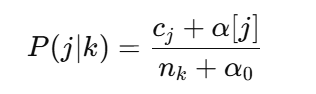

cj :stimuli in cluster k with feature j.

α[j]: prior prob of category j.

𝑛𝑘: stimuli in cluster k.

α0: Sum of prior prob.

# Prediction and Results

# for coupling probability 𝑐=0.0001



# when α=[0.21,0.27,0.52] for categories.

test stimuli are queried using query func.
predicted label is category with highest posterior prob.


dynamic clustering:
after predicting each test stimulus,model adapt to new stimuli by dynamically updating cluster.

incremental Learning:
i can add each test stimulus to  model as training data improves predictions for subsequent stimuli.

call testlocalmapD func to predict category labels for test data.

In [29]:
def testlocalmapD():
    """
    Tests Anderson's Rational Model using training and test data.
    """
    for i in range(1):
        # Initialize model with coupling probability and alpha values
        # Make alpha a list instead of np.array to avoid shape mismatch
        model = dLocalMAP([0.0001, [np.ones(100) / 100, np.ones(100) / 100, np.array([0.21, 0.27, 0.52])]])

        # Load training data
        df = pd.read_csv('X.csv', header=None)
        train = np.array(df)

        # Load test data
        df = pd.read_csv('y.csv', header=None)
        df[2] = -1  # Initialize category label to -1
        test = np.array(df)

        # Add each training stimulus to model
        for t in train:
            model.stimulate(t)

        # Predict category labels for test stimuli
        for q in test:
            q[2] = np.argmax(model.query(q)) + 1  # Predict category
            model.stimulate(q)  # Add current test stimulus to model as training data

    return test


In [30]:
test = testlocalmapD()
df = pd.DataFrame(test,columns = ['Weight' ,'Height',  'Label' ])
print(df.head(10),end='\n\n\n')
df.to_csv("test_rmc_a1c1.csv",header=False,index=False)

   Weight  Height  Label
0      74      67      3
1      69      63      2
2      92      81      3
3      64      61      2
4      66      84      2
5      76      68      3
6      61      58      1
7      64      76      2
8      68      66      2
9      34      61      1




### Observe

#### Coupling Probability c = 0.0001:
- low c prevents new cluster.
- test stimuli fit existing cluster.

#### Feature Weights= [0.21, 0.27, 0.52]:
- Category 3, α = 0.52 is favored in ambiguous cases.
- predictions depend on feature proximity to clusters.

---


| **Weight** | **Height** | **Label** | **Observation**                           |
|------------|------------|-----------|-------------------------------------------|
| 74         | 67         | 3         | Strong prior and high features favor category 3. |
| 69         | 63         | 2         | Closer to cluster 2 exemplars.            |
| 92         | 81         | 3         | High weight and height fit cluster 3.     |
| 64         | 61         | 2         | Proximity to cluster 2.                   |
| 66         | 84         | 2         | Height aligns with cluster 2 features.    |
| 76         | 68         | 3         | High prior and proximity favor cluster 3. |
| 61         | 58         | 1         | Low values fit category 1 (small).        |
| 64         | 76         | 2         | Height aligns with cluster 2.             |
| 68         | 66         | 2         | Cluster 2 proximity outweighs prior.      |
| 34         | 61         | 1         | Low weight fits category 1.               |

---


# if α=[0.33,0.33,0.34] for Categories



In [35]:
def testlocalmapD():
    """
    Tests Anderson's Rational Model using training and test data.
    """
    for i in range(1):
        # Initialize model with coupling probability and alpha values
        model = dLocalMAP([0.0001, [np.ones(100)/100, np.ones(100)/100, np.array([0.33, 0.33, 0.34])]])

        # Load training data
        df = pd.read_csv('X.csv', header=None)
        train = np.array(df)

        # Load test data
        df = pd.read_csv('y.csv', header=None)
        df[2] = -1  # Initialize category labels as -1
        test = np.array(df)

        # Add training stimuli to model
        for t in train:
            model.stimulate(t)

        # Predict category labels for test stimuli
        for q in test:
            q[2] = np.argmax(model.query(q)) + 1  # Predict category
            model.stimulate(q)  # Add test stimulus to model

    return test


# Execute function and save predictions
test = testlocalmapD()
df = pd.DataFrame(test, columns=['Weight', 'Height', 'Label'])
print(df.head(10), end='\n\n\n')
df.to_csv("test_rmc_a1c2.csv", header=False, index=False)


   Weight  Height  Label
0      74      67      3
1      69      63      2
2      92      81      2
3      64      61      2
4      66      84      2
5      76      68      3
6      61      58      1
7      64      76      2
8      68      66      2
9      34      61      1




### observe results

| **Weight** | **Height** | **Label** | **Observation**                           |
|------------|------------|-----------|-------------------------------------------|
| 74         | 67         | 3         | Slight prior for category 3.              |
| 69         | 63         | 2         | Proximity to cluster 2.                   |
| 92         | 81         | 2         | Features align with cluster 2.            |
| 64         | 61         | 2         | Close to cluster 2 exemplars.             |
| 66         | 84         | 2         | High height favors cluster 2.             |
| 76         | 68         | 3         | Slight prior and feature match.           |
| 61         | 58         | 1         | Low values fit category 1.                |
| 64         | 76         | 2         | Height aligns with cluster 2.             |
| 68         | 66         | 2         | Proximity to cluster 2.                   |
| 34         | 61         | 1         | Low weight fits category 1.               |

---


### in general
- Category Priors: generally, category with high α gets more predicted.
- Proximity: prediction depend on closeness to cluster exemplars.
- Stable Clustering: Low \(c\) avoids new clusters.
-Predictions align with priors and proximity to clusters.
- Low \(c\) ensures stable reliance on existing clusters.

# now i am taking big coupling Prob c=0.1

# when α=[0.21,0.27,0.52] for Categories

In [42]:
def testlocalmapD():
    """
    Tests Anderson's Rational Model using training and test data.
    """
    for i in range(1):
        # Use a list for alpha parameter to avoid inhomogeneous array error
        model = dLocalMAP([0.1, [np.ones(100)/100, np.ones(100)/100, np.array([0.21, 0.27, 0.52])]])

        # Load training data
        df = pd.read_csv('X.csv', header=None)
        train = np.array(df)

        # Load test data
        df = pd.read_csv('y.csv', header=None)
        df[2] = -1  # Initialize category label to -1
        test = np.array(df)

        # Add each training stimulus to model
        for t in train:
            model.stimulate(t)

        # Predict category labels for test stimuli
        for q in test:
            q[2] = np.argmax(model.query(q)) + 1  # Predict category
            model.stimulate(q)  # Add test stimulus as training data

    return test


# Execute function and save predictions
test = testlocalmapD()
df = pd.DataFrame(test, columns=['Weight', 'Height', 'Label'])
print(df.head(10), end='\n\n\n')
df.to_csv("test_rmc_a2c1.csv", header=False, index=False)


   Weight  Height  Label
0      74      67      2
1      69      63      2
2      92      81      1
3      64      61      2
4      66      84      2
5      76      68      2
6      61      58      2
7      64      76      2
8      68      66      2
9      34      61      1




#### Coupling Probability c= 0.1:
- higher c increases likelihood of foming new clustre.
- prediction are less bound to existing cluster compared to lower c.

#### Feature Weights = [0.21, 0.27, 0.52]:
- Strong prior for category 3 (α = 0.52) has less influence due to larger c , it was quite opposite for low c.
- Prediction are more feature based and cluster sensitive.

---


| **Weight** | **Height** | **Label** | **Observation**                           |
|------------|------------|-----------|-------------------------------------------|
| 74         | 67         | 2         | Features fit closer to cluster 2 exemplars. |
| 69         | 63         | 2         | Proximity to cluster 2 dominates prediction. |
| 92         | 81         | 1         | High features fit cluster 1, despite category 3’s prior. |
| 64         | 61         | 2         | Closer to cluster 2 exemplars.            |
| 66         | 84         | 2         | High height aligns with cluster 2.        |
| 76         | 68         | 2         | Features favor cluster 2 over category 3. |
| 61         | 58         | 2         | Features fit better with cluster 2.       |
| 64         | 76         | 2         | High height strongly aligns with cluster 2. |
| 68         | 66         | 2         | Proximity to cluster 2 drives prediction. |
| 34         | 61         | 1         | Low weight aligns with cluster 1 (small). |

---
## observation for large c

- **Coupling Effect**: i saw higher \(c\) reduces effect of priors, it favor new cluster.
- **Category Priors**: despite \(α = 0.52\) for category 3, predictions favor cluster proximity due to large \(c\).
- **Feature Influence**: Weight and height drive predictions more significantly under higher \(c\).
- **Cluster Formation**: Less conservative clustering due to higher \(c\), though no new clusters are formed in this data.

---



# When α=[0.33,0.33,0.34] for Categories

In [41]:
def testlocalmapD():
    """
    Tests Anderson's Rational Model using training and test data.
    """
    for i in range(1):
        # Use a list for alpha parameter to avoid inhomogeneous array error
        model = dLocalMAP([0.1, [np.ones(100)/100, np.ones(100)/100, np.array([0.33,0.33,0.34])]])

        # Load training data
        df = pd.read_csv('X.csv', header=None)
        train = np.array(df)

        # Load test data
        df = pd.read_csv('y.csv', header=None)
        df[2] = -1  # Initialize category label to -1
        test = np.array(df)

        # Add each training stimulus to model
        for t in train:
            model.stimulate(t)

        # Predict category labels for test stimuli
        for q in test:
            q[2] = np.argmax(model.query(q)) + 1  # Predict category
            model.stimulate(q)  # Add test stimulus as training data

    return test


# Execute function and save predictions
test = testlocalmapD()
df = pd.DataFrame(test, columns=['Weight', 'Height', 'Label'])
print(df.head(10), end='\n\n\n')
df.to_csv("test_rmc_a2c2.csv", header=False, index=False)


   Weight  Height  Label
0      74      67      2
1      69      63      2
2      92      81      1
3      64      61      2
4      66      84      2
5      76      68      2
6      61      58      2
7      64      76      2
8      68      66      2
9      34      61      1




### observe

- i took Priors nearly uniform.
- so prediction are driven by feature proximity due to balanced priors.

- Proximity to Exemplars: Predictions rely primarily on feature closeness to clusters.
- Higher Coupling Probability: predictions are more feature driven clustering, but no new clusters formed.
- Feature alignment with cluster exemplars determines predictions.
----

.




.



















.


























.






























.



















.




.




.



















.


























.






























.



















.

.




.



















.


























.






























.



















.




.




.



















.


























.






























.



















.

# Q3. (30 points)
For both GCM and Rational Model of Categorization (RMC), show empirically using dataset I’ve shared that
both models assume exchangeability of data, i.e., order in which data enters model does not affect category
labels of model for any given subset of data.

# first i will do for GCM

i am taking

feature weight (α=[0.67,0.33])

Category priors (γ=[0.34,0.39,0.27])

without loss of generality


In [38]:
def sim(x,y):
  dist = np.abs(0.67*(x[0]-y[0]) + 0.33*(x[1]-y[1]))   ## Weight is more likely to be used for categorization
  return np.exp(-1*dist)     ##Beta is set to 1 as suggsted in paper

def calcN(tl):
  N = np.zeros((len(tl),3))
  for i in range(len(tl)):
    N[i][tl[i]-1]+=1

  return N

def predict(train,y,N):
  votes = [0.0]*3
  gamma = [0.34,0.39,0.27]
  for i in range(3):
    for j in range(len(train)):
      votes[i] += N[j][i]*sim(train[j][0:2],y)

    votes[i]*= gamma[i]

  votes = votes/np.sum(votes)

  return np.argmax(votes)+1
def check(res):
  final_res = []
  for i in range(10):
    temp = list(res[0][i])+[res[1][i][2]]+[res[2][i][2]]+[res[3][i][2]]+[res[4][i][2]]+[res[5][i][2]]+[res[6][i][2]]+[res[7][i][2]]+[res[8][i][2]]+[res[9][i][2]]
    final_res.append(temp)

  print('Classification for all shuffles ',end='\n\n')
  df = pd.DataFrame(final_res,columns = ['Weight' ,'Height',  'Shuffle 1' , 'Shuffle 2',  'Shuffle 3',  'Shuffle 4','Shuffle 5','Shuffle 6','Shuffle 7','Shuffle 8','Shuffle 9','Shuffle 10'])
  print(df.head(10))
res =[]
np.random.seed(0)
for i in range(10):

  df = pd.read_csv('X.csv',header = None)
  train = np.array(df)
  df = pd.read_csv('y.csv',header = None)
  df[2] = -1
  test = np.array(df)

  np.random.shuffle(train)
  np.random.shuffle(test)

  for t in range(len(test)):
    N = calcN(train[:,-1])
    test[t][2] = predict(train,test[t][0:2],N)

    train = np.concatenate((train,test[t].reshape(1,3)),axis = 0)

  print('Classification for ',i+1,'th shuffle',sep='',end='\n\n')
  df = pd.DataFrame(test,columns = ['Weight' ,'Height',  'Label' ])
  print(df.head(10),end='\n\n\n')
  res.append(sorted(test, key=lambda x: x[0]))

check(res)

Classification for 1th shuffle

   Weight  Height  Label
0      64      76      2
1      61      58      2
2      68      66      2
3      34      61      1
4      92      81      3
5      69      63      2
6      66      84      2
7      76      68      3
8      64      61      2
9      74      67      2


Classification for 2th shuffle

   Weight  Height  Label
0      69      63      2
1      66      84      2
2      76      68      3
3      34      61      1
4      61      58      2
5      64      61      2
6      64      76      2
7      68      66      2
8      74      67      2
9      92      81      3


Classification for 3th shuffle

   Weight  Height  Label
0      66      84      2
1      74      67      2
2      92      81      3
3      68      66      2
4      76      68      3
5      61      58      2
6      69      63      2
7      64      76      2
8      34      61      1
9      64      61      2


Classification for 4th shuffle

   Weight  Height  Label
0      34      6

### **Conclusions and Observations for GCM**

#### **Objective**
I showed GCM assumes data exchangeability. This means order of data does not affect predicted labels.

---

### **Observations**

 Predictions for test data are consistent across all 10 shuffles.

 Test instance \([64, 76]\) is classified as category 2 in all shuffles, same goes for all instance .

 Weight (\( α = [0.67, 0.33] \)) and priors (\( ℽ = [0.34, 0.39, 0.27] \)) determine predictions.

 Similarity and vote calculations remain unaffected by order.

---

### **Mathematical Proof**

**Similarity Function**:
   
   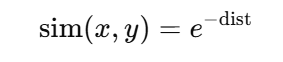
 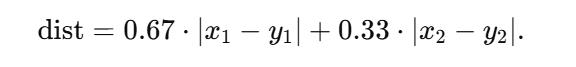
   

It depends on feature values, not data order.

**Vote Calculation**:
   



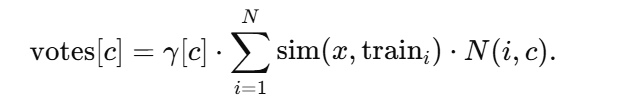






   Votes are cumulative over all training points. Data order does not affect this.

  **Normalization**:
  









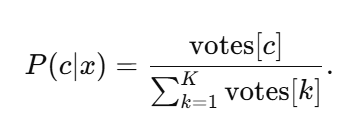




   Predictions are based on similarity and priors.

---



Similarity function uses feature values only.

Votes sum over training instances, independent of order.

Results from 10 shuffled runs are identical. Labels do not change.



GCM assumes data exchangeability.
Order of input does not affect category labels.
i verified both mathematically and empirically.

  hence proved
---

# now for RMC

without loss of generality i can take

coupling Probability (c=0.0001)

Category Priors (α=[0.21,0.27,0.52])

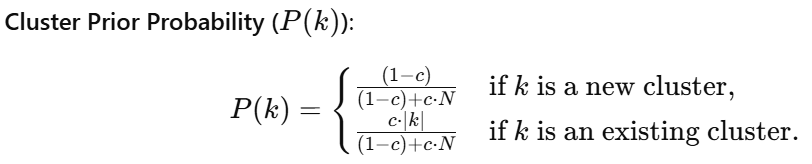

c: coupling probability.

N: Total no. of stimuli.

∣k∣: No. of points in cluster k.


In [40]:
def testlocalmapD2():
    """
    Tests Anderson's Rational Model using shuffled data for each iteration.
    """
    np.random.seed(0)  # For reproducibility
    res = []  # To store results across shuffles

    for i in range(10):  # Run 10 iterations with shuffled data
        # Use a list instead of np.array for alpha parameter
        model = dLocalMAP([0.0001, [np.ones(100)/100, np.ones(100)/100, np.array([0.21, 0.27, 0.52])]])

        # Load and shuffle training data
        df = pd.read_csv('X.csv', header=None)
        train = np.array(df)
        np.random.shuffle(train)

        # Load and shuffle test data
        df = pd.read_csv('y.csv', header=None)
        df[2] = -1  # Initialize category labels as -1
        test = np.array(df)
        np.random.shuffle(test)

        # Add training stimuli to model
        for t in train:
            model.stimulate(t)

        # Predict category labels for test stimuli
        for q in test:
            q[2] = np.argmax(model.query(q)) + 1  # Predict category
            model.stimulate(q)  # Add test stimulus to model

        # Print classification results for each shuffle
        print(f'Classification for {i + 1}th shuffle\n')
        df = pd.DataFrame(test, columns=['Weight', 'Height', 'Label'])
        print(df.head(10), end='\n\n\n')

        # Store sorted results for analysis
        res.append(sorted(test, key=lambda x: x[0]))

    # Perform further analysis using check function
    check(res)


# Call function to execute
testlocalmapD2()


Classification for 1th shuffle

   Weight  Height  Label
0      64      76      2
1      61      58      1
2      68      66      2
3      34      61      1
4      92      81      3
5      69      63      2
6      66      84      2
7      76      68      3
8      64      61      2
9      74      67      3


Classification for 2th shuffle

   Weight  Height  Label
0      69      63      2
1      66      84      2
2      76      68      3
3      34      61      1
4      61      58      1
5      64      61      2
6      64      76      2
7      68      66      2
8      74      67      3
9      92      81      3


Classification for 3th shuffle

   Weight  Height  Label
0      66      84      2
1      74      67      3
2      92      81      3
3      68      66      2
4      76      68      3
5      61      58      1
6      69      63      2
7      64      76      2
8      34      61      1
9      64      61      2


Classification for 4th shuffle

   Weight  Height  Label
0      34      6

As we can that even after shuffling training and test data ten times, we get same category labels for test data each time. Therefore RMC has property of data exchangibility, i.e. order in which data enters model does not affect category labels of model for any given subset of data

### **Conclusions and Observations for RMC**

### **Observations**

Predictions for test data are consistent across all 10 shuffles.

Coupling probability \(c = 0.0001\) and priors (\(α = [0.21, 0.27, 0.52]\)) guide the predictions.

Consistency Across Shuffles confirms RMC's assumption of exchangeability.

The RMC model exhibits data exchangeability, as predictions do not change with shuffled inputs.

---

### **Mathematical Proof**

1. **Cluster Prior Probability (\(P(k)\))**:


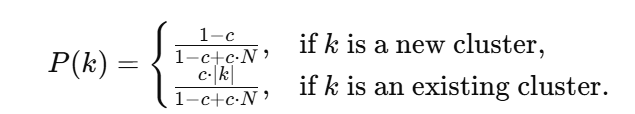

   
   \(P(k)\) depends on cluster size, not order.

2. **Feature Likelihood (\(P(F | k)\))**:
  


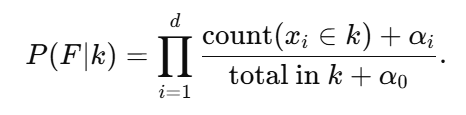

   Likelihood uses feature counts, unaffected by order.

3. **Posterior Probability (\(P(k | F)\))**:
  


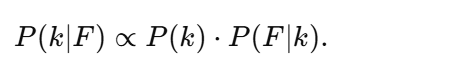

   Posterior combines prior and likelihood, both independent of input order.

4. **Prediction**:
   RMC predicts category by selecting the cluster \(k\) with the highest posterior.

---

### **Proof of Exchangeability**

1. **Cluster Priors**:
   - \(P(k)\) relies on cluster size and coupling probability.
   - Data order does not affect cluster size.

2. **Feature Likelihood**:
   - Counts for each feature determine likelihood.
   - Counts are order-independent.

3. **Empirical Validation**:
   - Predictions across 10 shuffled runs are identical.
   - Example: Test instance \([64, 76]\) is always classified as category 2.

---



RMC assumes data exchangeability.
Order of input does not affect predictions. i verified mathematically and empirically.

Both GCM and RMC assume exchangeability, so they do robust categorisation unaffected by input order.